<a href="https://colab.research.google.com/github/AugustinCablant/Viager/blob/main/stat_des.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/Stage')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_stata('data_tetes_back_match.dta')

<ipython-input-4-3f624abf7f5e>:1: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  df = pd.read_stata('data_tetes_back_match.dta')


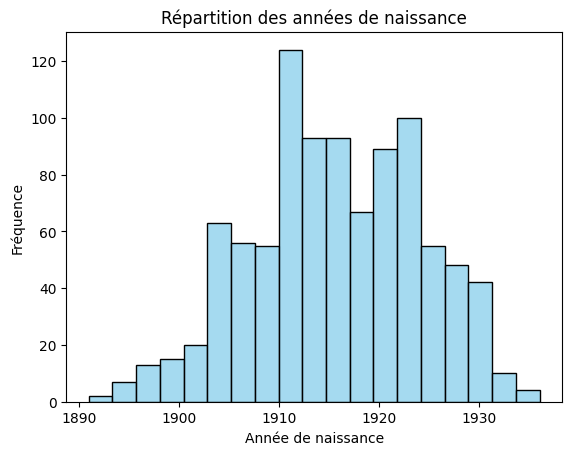

In [12]:
np.random.seed(42)

# Créer l'histogramme avec Seaborn
sns.histplot(df['b_annee'], kde=False, color='skyblue', edgecolor='black')

# Ajouter des labels et un titre
plt.xlabel('Année de naissance')
plt.ylabel('Fréquence')
plt.title('Répartition des années de naissance')

# Afficher l'histogramme
plt.show()

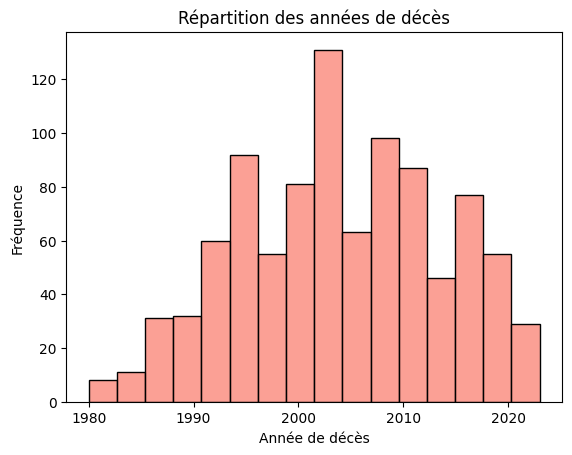

In [13]:
np.random.seed(42)

# Créer l'histogramme avec Seaborn
sns.histplot(df['d_annee'], kde=False, color='salmon', edgecolor='black')

# Ajouter des labels et un titre
plt.xlabel('Année de décès')
plt.ylabel('Fréquence')
plt.title('Répartition des années de décès')

# Afficher l'histogramme
plt.show()

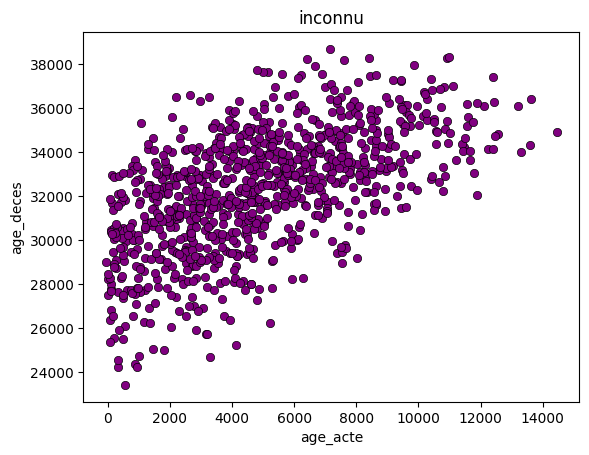

In [17]:
sns.scatterplot(x = df['age_acte'],y =df['age_deces'] ,  color='purple', edgecolor='black')

# Ajouter des labels et un titre
plt.xlabel('age_acte')
plt.ylabel('age_deces')
plt.title('inconnu')

# Afficher l'histogramme
plt.show()

In [19]:
df['age2'] = df['d_annee'] - df['b_annee']
df['ageacte2'] = df['annee'] - df['b_annee']

<ipython-input-19-38b3465431bc>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['age2'] = df['d_annee'] - df['b_annee']
<ipython-input-19-38b3465431bc>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['ageacte2'] = df['annee'] - df['b_annee']


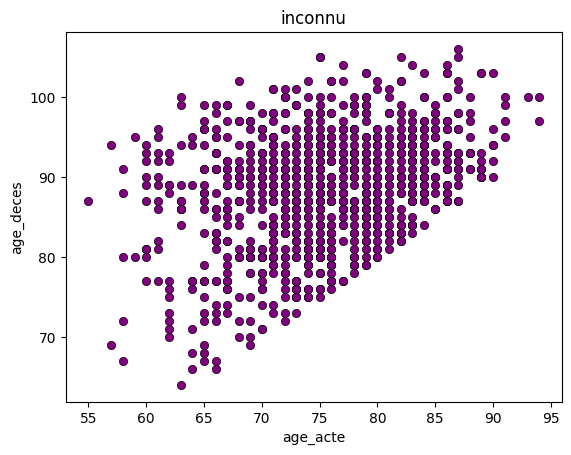

In [20]:
sns.scatterplot(x = df['ageacte2'],y =df['age2'] ,  color='purple', edgecolor='black')

# Ajouter des labels et un titre
plt.xlabel('age_acte')
plt.ylabel('age_deces')
plt.title('inconnu')

# Afficher l'histogramme
plt.show()